In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Exploring the Data

In [4]:
import matplotlib.pyplot as plt
from numpy import random

In [5]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot" 
]

In [6]:
len(train_data)

60000

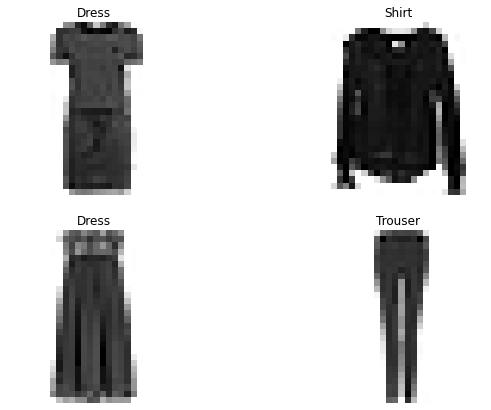

In [7]:
def show_image():
    
    plt.figure(figsize=(10, 7))
    
    for i in range(4):
        index = random.randint(len(train_data))
        plt.subplot(2, 2, i+1)
        plt.imshow(train_data[index], cmap=plt.cm.binary)
        plt.title(f"{class_names[train_labels[index]]}")
        plt.axis("off")
        
    plt.show()
    
    
show_image()

In [8]:
print(f"Training data shape {train_data[0].shape}")
print(f"Training label shape {train_labels[0].shape}")

Training data shape (28, 28)
Training label shape ()


# Building and Compiling the Neural Network Model

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    
    #Flattening the data
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    #hidden layers
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    
    #output layer, 10 neurons for each class
    #activation used is softmax for multiclass - sigmoid for binary
    tf.keras.layers.Dense(10, activation="softmax")
])


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

# Fitting the Model using Non-normalized Training Set

In [11]:
non_normalized = model.fit(
    train_data,
    train_labels,
    epochs=20,
    validation_data=((test_data, test_labels))
)

Epoch 1/20
1875/1875 [==============================] - 2s 826us/step - loss: 2.1568 - accuracy: 0.1639 - val_loss: 1.7870 - val_accuracy: 0.2136
Epoch 2/20
1875/1875 [==============================] - 1s 699us/step - loss: 1.6997 - accuracy: 0.2536 - val_loss: 1.6468 - val_accuracy: 0.2816
Epoch 3/20
1875/1875 [==============================] - 1s 700us/step - loss: 1.6316 - accuracy: 0.2802 - val_loss: 1.6084 - val_accuracy: 0.2831
Epoch 4/20
1875/1875 [==============================] - 1s 704us/step - loss: 1.6027 - accuracy: 0.2844 - val_loss: 1.6116 - val_accuracy: 0.2896
Epoch 5/20
1875/1875 [==============================] - 1s 709us/step - loss: 1.6009 - accuracy: 0.2864 - val_loss: 1.5934 - val_accuracy: 0.2926
Epoch 6/20
1875/1875 [==============================] - 1s 712us/step - loss: 1.5897 - accuracy: 0.2952 - val_loss: 1.5774 - val_accuracy: 0.2836
Epoch 7/20
1875/1875 [==============================] - 1s 719us/step - loss: 1.5781 - accuracy: 0.3060 - val_loss: 1.5727 -

In [12]:
non_normalized_probs = model.predict(test_data)

In [13]:
non_normalized_probs[0]

array([1.2907946e-11, 1.4681934e-37, 0.0000000e+00, 7.6357039e-32,
       2.0688498e-15, 4.6759173e-02, 1.5455078e-13, 2.8891256e-01,
       3.1620709e-04, 6.6401201e-01], dtype=float32)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Improving the accuracy by Scaling the pixel values (Normalization)

In [15]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.5

In [16]:
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
model_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [23]:
model_norm.fit(
    tf.expand_dims(train_data_norm, axis=-1),
    train_labels,
    epochs=30,
    validation_data=((test_data, test_labels))
)

Epoch 1/30
1875/1875 [==============================] - 2s 829us/step - loss: 0.3444 - accuracy: 0.8770 - val_loss: 99.5638 - val_accuracy: 0.7905
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3432 - accuracy: 0.8776 - val_loss: 120.4781 - val_accuracy: 0.7628
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3423 - accuracy: 0.8774 - val_loss: 102.2839 - val_accuracy: 0.7814
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3398 - accuracy: 0.8784 - val_loss: 118.8099 - val_accuracy: 0.7683
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3384 - accuracy: 0.8790 - val_loss: 118.1944 - val_accuracy: 0.7739
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3384 - accuracy: 0.8785 - val_loss: 118.1101 - val_accuracy: 0.7749
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3371 - accuracy: 0.8795 - val_loss: 93.2216 -

# Evaluating the Performance of the new model by creating a confusion matrix plot

In [24]:
y_probs = model_norm.predict(test_data_norm)

In [25]:
y_preds = []


for y in y_probs:
    prob = tf.argmax(y).numpy()
    y_preds.append(prob)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(test_labels, y_preds)

In [28]:
import seaborn as sns

Text(69.0, 0.5, 'truth')

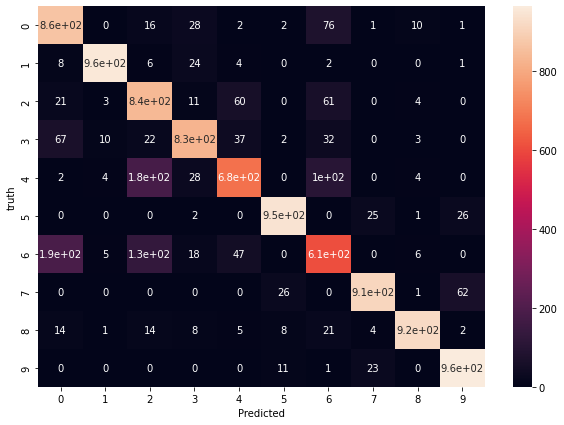

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')

Conclusion:

* Overall Accuracy: 88.69%